# **1. Data Understanding & Exploration**

In [22]:
# %pip install pandas numpy nltk spacy gensim beautifulsoup4 contractions wordcloud textblob vaderSentiment scikit-learn tensorflow transformers matplotlib seaborn scikit-plot
# %pip install tf-keras

## *libraries*

In [8]:
import pandas as pd  # DataFrames, CSV handling
import numpy as np  # Numerical operations
import re  # Regular expressions for text cleaning
import string  # Punctuation handling
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # Stopwords removal
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer, PorterStemmer  # Lemmatization & Stemming
from bs4 import BeautifulSoup  # Removing HTML tags
import contractions  # Expanding contractions (e.g., "don't" → "do not")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # BoW, TF-IDF
from gensim.models import Word2Vec  # Word embeddings
import spacy  # Advanced NLP processing
!python -m spacy download en_core_web_sm  # Small English model
import matplotlib.pyplot as plt  # Standard plotting
import seaborn as sns  # Statistical data visualization
from wordcloud import WordCloud  # Word cloud visualization
from collections import Counter  # Word frequency analysis
from textblob import TextBlob  # Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # VADER for short text sentiment
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.naive_bayes import MultinomialNB  # Naïve Bayes classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.pipeline import Pipeline  # Building ML pipelines
from sklearn.preprocessing import LabelEncoder  # Encoding categorical labels
import tensorflow as tf  # Deep learning framework
from tensorflow.keras.preprocessing.text import Tokenizer  # Text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Sequence padding
from tensorflow.keras.models import Sequential  # Model initialization
from tensorflow.keras.layers import Embedding, LSTM, Dense  # Layers for RNN
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D  # Layers for CNN
from tensorflow.keras.layers import Dropout  # Dropout layer
# from transformers import BertTokenizer, TFBertModel  # BERT model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import scikitplot as skplt  # Pretty confusion matrix
import datetime  # Handling dates
import time  # Time conversions
import joblib  # Save & load ML models
import pickle  # Save Python objects
import warnings  # Ignore warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to C:\Users\Edwin
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Edwin
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Edwin
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


## **1.1 Loading and Inspecting the Dataset**

In [10]:
p_movies = pd.read_csv("cleaned_p_movies.csv")
p_movies.head()

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories,year,month,weekday
0,4,Four Stars,It was pretty good. Had some pretty comical sc...,B01KBKKU7G,B01KBKKU7G,2016-09-16 18:39:49.000,True,Prime Video,Seven Girlfriends,3.2,333.0,"[""Jesse has never had a problem finding a gir...",12.99,Comedy,2016,9,Friday
1,3,Ok love story,A bit slow and an unsatisfying ending,B01M0S0C8M,B01M0S0C8M,2016-11-08 22:14:17.000,True,Prime Video,Still Mine,4.6,4744.0,"[""James Cromwell gives a tour de force perform...",9.99,Drama,2016,11,Tuesday
2,1,TRASH,A movie based solely on INCEST. Storyline is g...,B00G2TAAVM,B00G2TAAVM,2022-08-22 20:06:25.847,True,Prime Video,How I Live Now,4.3,907.0,"['Set in the near-future UK, Saoirse Ronan pla...",12.99,International,2022,8,Monday
3,5,Five Stars,Excellent!!!,B018HJ03UC,B018HJ03UC,2016-01-25 18:47:06.000,True,Prime Video,The Martian,4.8,45859.0,"['From legendary director Ridley Scott (Alien,...",4.99,Science Fiction,2016,1,Monday
4,2,Not what it used to be,This used to be a favorite of mine but I just ...,B07FLP19K1,B07FLP19K1,2018-12-03 16:52:02.089,True,Prime Video,On The Case with Paula Zahn,4.6,141.0,['On The Case with Paula Zahn takes viewers on...,22.99,Suspense,2018,12,Monday


In [11]:
# Check dataset structure
p_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24112 entries, 0 to 24111
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             24112 non-null  int64  
 1   title_x            24112 non-null  object 
 2   text               24112 non-null  object 
 3   asin               24112 non-null  object 
 4   parent_asin        24112 non-null  object 
 5   timestamp          24112 non-null  object 
 6   verified_purchase  24112 non-null  bool   
 7   main_category      24112 non-null  object 
 8   title_y            24112 non-null  object 
 9   average_rating     24112 non-null  float64
 10  rating_number      24112 non-null  float64
 11  description        24112 non-null  object 
 12  price              24112 non-null  float64
 13  categories         24112 non-null  object 
 14  year               24112 non-null  int64  
 15  month              24112 non-null  int64  
 16  weekday            241

In [12]:
# Summary statistics (including categorical features)
p_movies.describe(include='all')

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories,year,month,weekday
count,24112.000000,24112,24112,24112,24112,24112,24112,24112,24112,24112.000000,24112.000000,24112,24112.000000,24112,24112.000000,24112.000000,24112
unique,NaN,14926,21799,6220,6220,24108,2,1,5392,NaN,NaN,5737,NaN,29,NaN,NaN,7
top,NaN,Five Stars,Great movie,B07S3XZRM4,B07S3XZRM4,2016-02-28 02:41:52.000,True,Prime Video,Aladdin,NaN,NaN,['From Disney comes the thrilling and vibrant ...,NaN,Comedy,NaN,NaN,Monday
freq,NaN,3059,146,265,265,2,19839,24112,287,NaN,NaN,287,NaN,5839,NaN,NaN,3676
mean,4.121724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.507005,13685.687873,NaN,14.568819,NaN,2017.147686,6.358825,NaN
std,1.269626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358735,21184.469923,NaN,7.191598,NaN,2.602637,3.518188,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.900000,2.000000,NaN,0.000000,NaN,2009.000000,1.000000,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.400000,990.000000,NaN,9.990000,NaN,2015.000000,3.000000,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.600000,5021.500000,NaN,14.690000,NaN,2017.000000,6.000000,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.700000,17750.000000,NaN,16.790000,NaN,2019.000000,9.000000,NaN


In [13]:
# Check for missing values
p_movies.isnull().sum()

rating               0
title_x              0
text                 0
asin                 0
parent_asin          0
timestamp            0
verified_purchase    0
main_category        0
title_y              0
average_rating       0
rating_number        0
description          0
price                0
categories           0
year                 0
month                0
weekday              0
dtype: int64

In [14]:
# Check for duplicate rows
p_movies.duplicated().sum()

0

In [20]:
p_movies.columns

Index(['rating', 'title_x', 'text', 'asin', 'parent_asin', 'timestamp',
       'verified_purchase', 'main_category', 'title_y', 'average_rating',
       'rating_number', 'description', 'price', 'categories', 'year', 'month',
       'weekday'],
      dtype='object')

## **1.2 Explore Text Data**

In [15]:
# View random text samples
p_movies['text'].sample(10)

# Check for special characters, emojis, HTML tags
import re
p_movies['text'].apply(lambda x: re.findall(r'[^\w\s]', str(x))).explode().value_counts()


text
.    69347
,    35728
'    16313
/    10550
!    10371
     ...  
😱        1
🎬        1
🤢        1
💘        1
∞        1
Name: count, Length: 115, dtype: int64

## **1.3 Check Class Distributions (if classification task)**

In [21]:
# If there is a categorical label column
if 'text' in p_movies.columns:
    print(p_movies['text'].value_counts(normalize=True))  # Check class balance

text
Great movie                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## **2. Data Cleaning & Preprocessing**

### **2.1 Text Normalization**

In [24]:
# import nltk
# import string
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean text
def clean_text(text):
    if isinstance(text, str):  # Ensure text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        tokens = word_tokenize(text)  # Tokenize text
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
        return ' '.join(tokens)
    return text  # Return unchanged if not a string

# Apply cleaning function to 'text' column
p_movies['text'] = p_movies['text'].apply(clean_text)
p_movies.head()

[nltk_data] Downloading package stopwords to C:\Users\Edwin
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Edwin
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Edwin
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories,year,month,weekday
0,4,Four Stars,pretty good pretty comical scene throughout gr...,B01KBKKU7G,B01KBKKU7G,2016-09-16 18:39:49.000,True,Prime Video,Seven Girlfriends,3.2,333.0,"[""Jesse has never had a problem finding a gir...",12.99,Comedy,2016,9,Friday
1,3,Ok love story,bit slow unsatisfying ending,B01M0S0C8M,B01M0S0C8M,2016-11-08 22:14:17.000,True,Prime Video,Still Mine,4.6,4744.0,"[""James Cromwell gives a tour de force perform...",9.99,Drama,2016,11,Tuesday
2,1,TRASH,movie based solely incest storyline garbage ac...,B00G2TAAVM,B00G2TAAVM,2022-08-22 20:06:25.847,True,Prime Video,How I Live Now,4.3,907.0,"['Set in the near-future UK, Saoirse Ronan pla...",12.99,International,2022,8,Monday
3,5,Five Stars,excellent,B018HJ03UC,B018HJ03UC,2016-01-25 18:47:06.000,True,Prime Video,The Martian,4.8,45859.0,"['From legendary director Ridley Scott (Alien,...",4.99,Science Fiction,2016,1,Monday
4,2,Not what it used to be,used favorite mine ’ enjoy anymore way zahn le...,B07FLP19K1,B07FLP19K1,2018-12-03 16:52:02.089,True,Prime Video,On The Case with Paula Zahn,4.6,141.0,['On The Case with Paula Zahn takes viewers on...,22.99,Suspense,2018,12,Monday


### **2.2 Handle Categorical Features**

In [25]:
# from sklearn.preprocessing import LabelEncoder

# # Encode categorical columns (if needed)
# categorical_cols = ['verified_purchase', 'main_category']
# label_encoders = {}

# for col in categorical_cols:
#     le = LabelEncoder()
#     p_movies[col] = le.fit_transform(p_movies[col].astype(str))
#     label_encoders[col] = le  # Store encoder for inverse transform if needed


# **3. Exploratory Data Analysis (EDA) & Visualizations**

### **3.1 Distribution of Ratings**

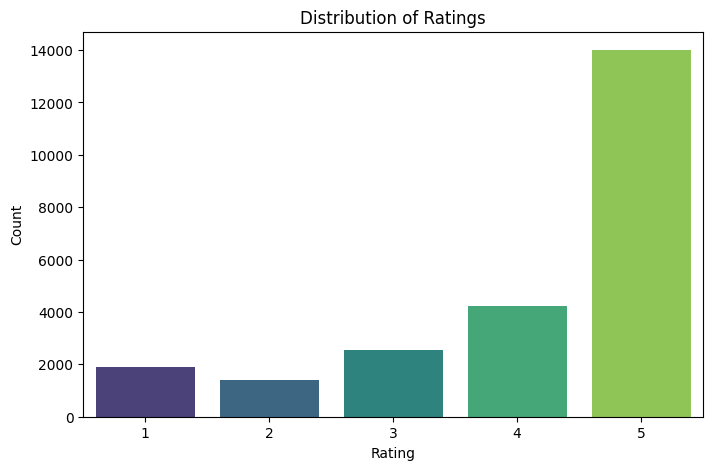

In [26]:
# Plot distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=p_movies, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### **3.2 Time-Based Trends (Reviews Over Time)**

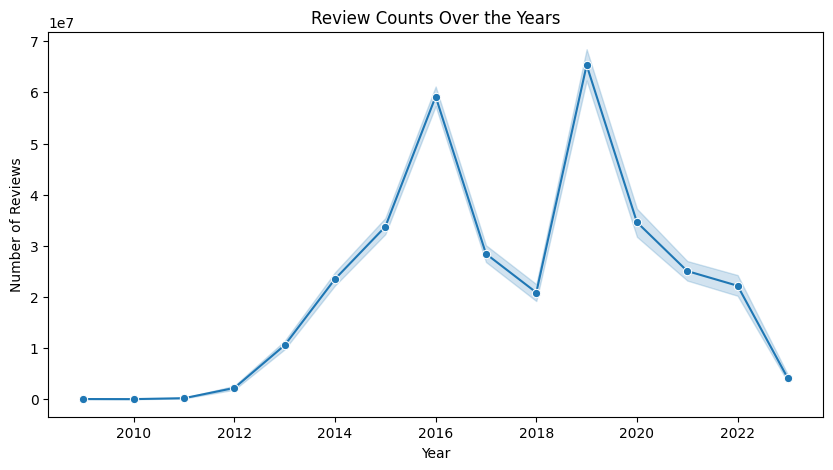

In [27]:
# Reviews per year
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='rating_number', data=p_movies, estimator='sum', marker='o')
plt.title('Review Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


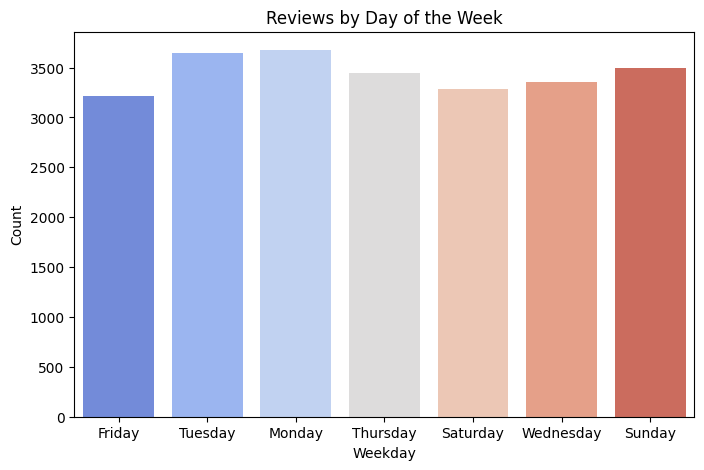

In [29]:
# Reviews by weekday
plt.figure(figsize=(8, 5))
sns.countplot(x='weekday', data=p_movies, palette='coolwarm')
plt.title('Reviews by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()


### **3.3 Price vs. Average Rating Analysis**

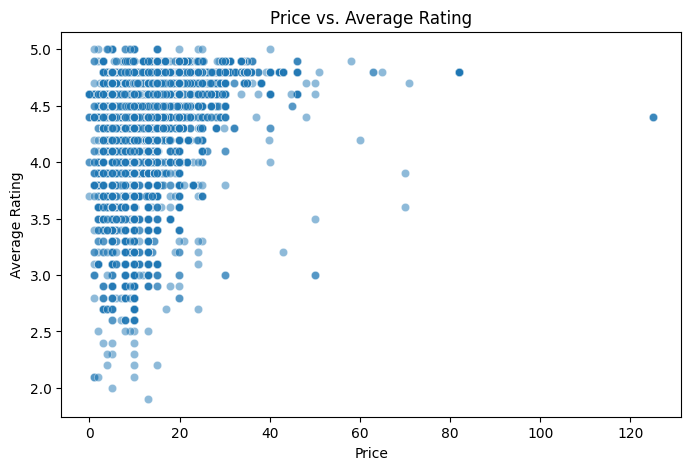

In [30]:
# Convert price column to numeric (handle missing values first)
p_movies['price'] = pd.to_numeric(p_movies['price'], errors='coerce')

# Scatter plot of price vs. average rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='average_rating', data=p_movies, alpha=0.5)
plt.title('Price vs. Average Rating')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()


### **3.4 Correlation Heatmap (Numerical Features Only)**

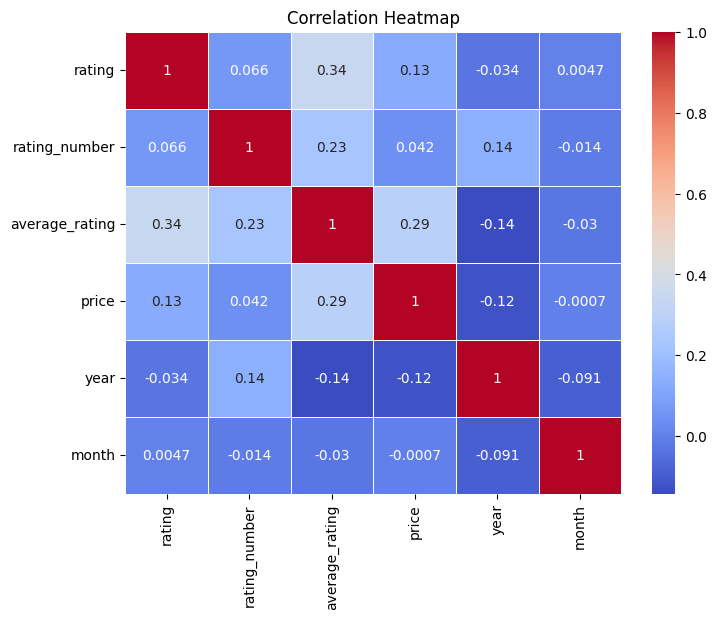

In [32]:
# Convert rating_number to numeric if necessary
p_movies['rating_number'] = pd.to_numeric(p_movies['rating_number'], errors='coerce')

# Compute correlation
numeric_cols = ['rating', 'rating_number', 'average_rating', 'price', 'year', 'month']
corr_matrix = p_movies[numeric_cols].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### **3.5 Most Common Categories**

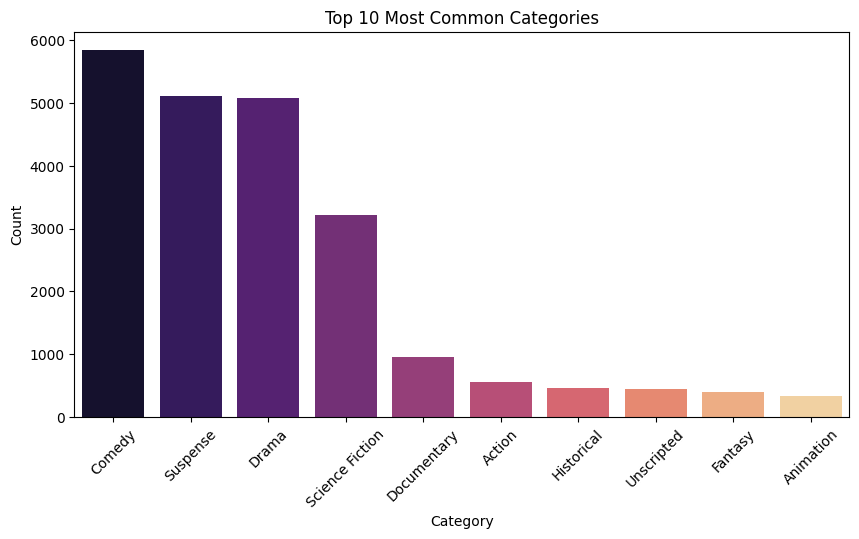

In [34]:
# Countplot for top categories
plt.figure(figsize=(10, 5))
sns.barplot(x=p_movies['categories'].value_counts().index[:10], 
            y=p_movies['categories'].value_counts().values[:10], 
            palette='magma')
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
